In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

C:\Users\jacks\AppData\Local\Temp\ipykernel_12564\717365041.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [171]:
path = './data'
team_logos = {
    'Fulham': './logo/Fulham.png',
    'Crystal Palace': './logo/Crystal_Palace.png',
    'Liverpool': './logo/Liverpool.png',
    'West Ham': './logo/West_Ham.png',
    'West Brom': './logo/West_Brom.png',
    'Tottenham': './logo/Tottenham.jpeg',
    'Brighton': './logo/Brighton.png',
    'Sheffield United': './logo/Sheffield_United.png',
    'Everton': './logo/Everton.png',
    'Leeds': './logo/Leeds.png',
    'Man United': './logo/Man_United.png',
    'Arsenal': './logo/Arsenal.png',
    'Southampton': './logo/Southampton.png',
    'Newcastle': './logo/Newcastle.png',
    'Chelsea': './logo/Chelsea.png',
    'Leicester': './logo/Leicester.png',
    'Aston Villa': './logo/Aston_Villa.png',
    'Wolves': './logo/Wolves.png',
    'Burnley': './logo/Burnley.png',
    'Man City': './logo/Man_City.png',
    'Brentford': './logo/Brentford.png',
    'Watford': './logo/Watford.png',
    'Norwich': './logo/Norwich.png',
    'Bournemouth': './logo/Bournemouth.jpeg',
    'Nott\'m Forest': './logo/Forest.png',
}

epl23 = pd.read_csv(f'{path}/EPL2324.csv')
epl22 = pd.read_csv(f'{path}/EPL2223.csv')
epl21 = pd.read_csv(f'{path}/EPL2122.csv')
epl20 = pd.read_csv(f'{path}/EPL2021.csv')
epl19 = pd.read_csv(f'{path}/EPL1920.csv')
epl = pd.concat([epl19, epl20, epl21, epl22, epl23], axis=0)
epl.index = range(len(epl))
epl = epl.dropna()
fttg = epl['FTHG'] + epl['FTAG']
ftr_s = epl['FTHG'].astype(str) + ':' + epl['FTAG'].astype(str)
epl.insert(loc = 7,
          column = 'FTTG',
          value = fttg)
epl.insert(loc = 8,
          column = 'FTR_S',
          value = ftr_s)
epl

,Div,Date,Time,HomeTeam,AwayTeam,FTHG,FTAG,FTTG,FTR_S,FTR,...,AvgC<2.5,AHCh,B365CAHH,B365CAHA,PCAHH,PCAHA,MaxCAHH,MaxCAHA,AvgCAHH,AvgCAHA
0,E0,09/08/2019,20:00,Liverpool,Norwich,4,1,5,4:1,H,...,3.43,-2.25,1.91,1.99,1.94,1.98,1.99,2.07,1.90,1.99
1,E0,10/08/2019,12:30,West Ham,Man City,0,5,5,0:5,A,...,2.91,1.75,1.95,1.95,1.96,1.97,2.07,1.98,1.97,1.92
2,E0,10/08/2019,15:00,Bournemouth,Sheffield United,1,1,2,1:1,D,...,1.92,-0.50,1.95,1.95,1.98,1.95,2.00,1.96,1.96,1.92
3,E0,10/08/2019,15:00,Burnley,Southampton,3,0,3,3:0,H,...,1.71,0.00,1.87,2.03,1.89,2.03,1.90,2.07,1.86,2.02
4,E0,10/08/2019,15:00,Crystal Palace,Everton,0,0,0,0:0,D,...,1.71,0.25,1.82,2.08,1.97,1.96,2.03,2.08,1.96,1.93
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1629,E0,30/12/2023,17:30,Nott'm Forest,Man United,2,1,3,2:1,H,...,2.14,0.25,1.99,1.94,2.00,1.93,2.09,1.94,1.97,1.89
1630,E0,31/12/2023,14:00,Fulham,Arsenal,2,1,3,2:1,H,...,2.04,1.00,1.89,2.04,1.87,2.06,2.02,2.07,1.89,1.98
1631,E0,31/12/2023,14:00,Tottenham,Bournemouth,3,1,4,3:1,H,...,3.41,-0.75,1.98,1.95,2.00,1.93,2.00,2.00,1.93,1.93
1632,E0,01/01/2024,20:00,Liverpool,Newcastle,4,2,6,4:2,H,...,3.12,-1.50,2.01,1.92,1.98,1.93,2.14,1.94,2.01,1.87


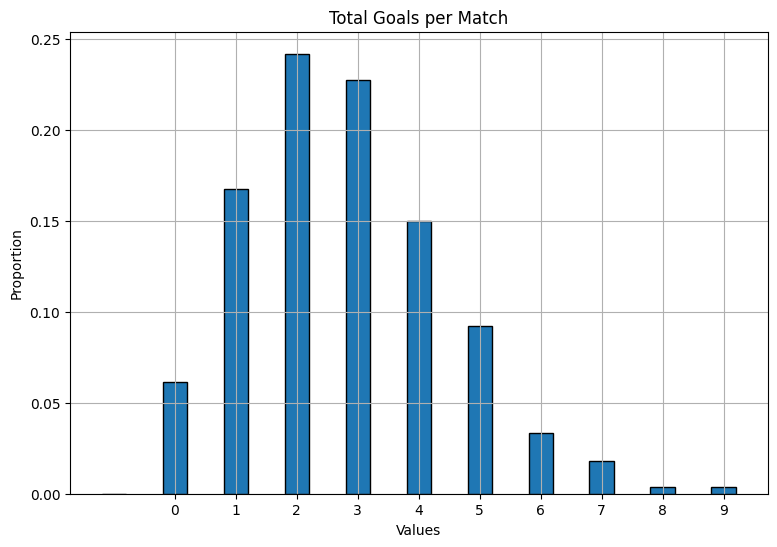

In [172]:
fttg = epl['FTTG']
bin_edges = np.arange(-1.5, 10.5, 1)
plt.figure(figsize=(9, 6))
plt.hist(fttg, bins=bin_edges, edgecolor='black', rwidth=0.4, density=True)
plt.xlabel('Values')
plt.ylabel('Proportion')
plt.title('Total Goals per Match')
plt.grid(True)
plt.xticks(range(10))
plt.show()

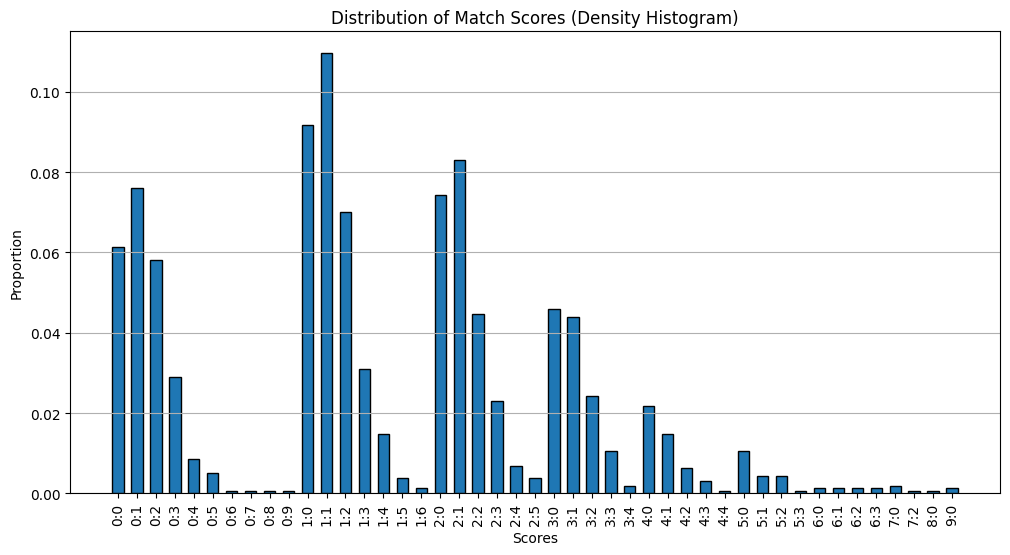

In [173]:
ftr_s = epl['FTR_S']
bin_edges = np.arange(-1.5, 10.5, 1)

score_counts = ftr_s.value_counts(normalize=True).sort_index()

# Plot the density histogram as a bar chart
plt.figure(figsize=(12, 6))
plt.bar(score_counts.index, score_counts.values, edgecolor='black', width=0.6)
plt.xlabel('Scores')
plt.ylabel('Proportion')
plt.title('Distribution of Match Scores (Density Histogram)')
plt.grid(axis='y')

# Display x-axis labels for all scores
plt.xticks(rotation=90)

plt.show()

In [174]:
teams = epl['HomeTeam'].unique()
stats = {team: {'Total Games': 0, 'Total Home Games': 0, 'Total Away Games': 0, 'Home Goal': 0, 'Home Loss': 0, 'HT Home Goal': 0, 'HT Home Loss': 0,
                'Away Goal':0, 'Away Loss': 0, 'HT Away Goal':0, 'HT Away Loss':0, 'Home B365<2.5': 0, 'Home B365>2.5': 0, 'Away B365<2.5': 0, 'Away B365>2.5': 0} for team in teams}
for _, row in epl.iterrows():
    ht = row['HomeTeam']
    at = row['AwayTeam']
    stats[ht]['Total Games'] += 1
    stats[ht]['Total Home Games'] += 1
    stats[at]['Total Games'] += 1
    stats[at]['Total Away Games'] += 1
    stats[ht]['Home Goal'] += row['FTHG']
    stats[ht]['Home Loss'] += row['FTAG']
    stats[ht]['HT Home Goal'] += row['HTHG']
    stats[ht]['HT Home Loss'] += row['HTAG']
    stats[at]['Away Goal'] += row['FTAG']
    stats[at]['Away Loss'] += row['FTHG']
    stats[at]['HT Away Goal'] += row['HTAG']
    stats[at]['HT Away Loss'] += row['HTHG']
    stats[ht]['Home B365<2.5'] += row['B365<2.5'] 
    stats[ht]['Home B365>2.5'] += row['B365>2.5'] 
    stats[at]['Away B365<2.5'] += row['B365<2.5'] 
    stats[at]['Away B365>2.5'] += row['B365>2.5'] 
for team in teams:
    stats[team]['Avg Home Goal'] = stats[team]['Home Goal'] / stats[team]['Total Home Games']
    stats[team]['Avg HT Home Goal'] = stats[team]['HT Home Goal'] / stats[team]['Total Home Games']
    stats[team]['Avg Away Goal'] = stats[team]['Away Goal'] / stats[team]['Total Away Games']
    stats[team]['Avg HT Away Goal'] = stats[team]['HT Away Goal'] / stats[team]['Total Away Games']
    stats[team]['Avg Home Loss'] = stats[team]['Home Loss'] / stats[team]['Total Home Games']
    stats[team]['Avg HT Home Loss'] = stats[team]['HT Home Loss'] / stats[team]['Total Home Games']
    stats[team]['Avg Away Loss'] = stats[team]['Away Loss'] / stats[team]['Total Away Games']
    stats[team]['Avg HT Away Loss'] = stats[team]['HT Away Loss'] / stats[team]['Total Away Games']
    stats[team]['Home B365>2.5'] /= stats[team]['Total Home Games']
    stats[team]['Home B365<2.5'] /= stats[team]['Total Home Games']
    stats[team]['Away B365>2.5'] /= stats[team]['Total Away Games']
    stats[team]['Away B365<2.5'] /= stats[team]['Total Away Games']
    
df = pd.DataFrame.from_dict(stats, orient='index')
df.reset_index(inplace=True)
df.rename(columns={'index': 'Teams'}, inplace=True)
df = df[df['Total Games'] >= 50]

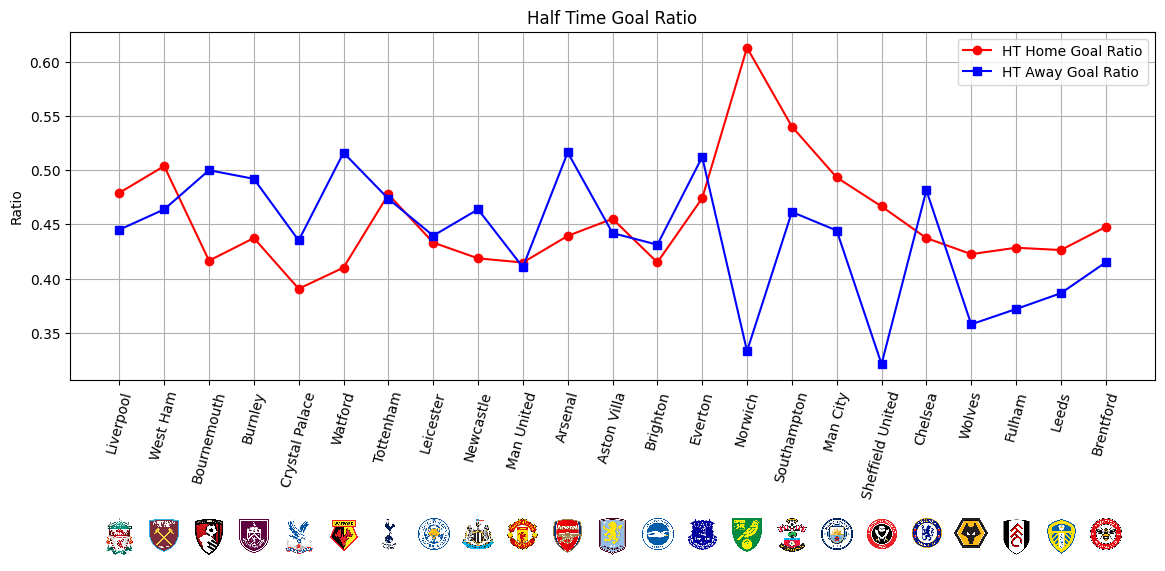

In [175]:
home_ratio = df['HT Home Goal'] / df['Home Goal']
away_ratio = df['HT Away Goal'] / df['Away Goal']

fig, ax = plt.subplots(figsize=(14, 6))
ax.plot(df['Teams'], home_ratio, marker='o', linestyle='-', label='HT Home Goal Ratio', color = 'r')
ax.plot(df['Teams'], away_ratio, marker='s', linestyle='-', label='HT Away Goal Ratio', color = 'b')
ax.set_ylabel('Ratio')
ax.set_title('Half Time Goal Ratio')
ax.legend()

ax.set_xticks(range(len(df['Teams'])))
plt.xticks(rotation=75)
# ax.set_xticklabels([''] * len(df['Teams']))  # Remove x-tick labels

# Add team logos below the x-axis, outside the plot area
for i, team in enumerate(df['Teams']):
    logo_path = team_logos[team]
    logo_img = mpimg.imread(logo_path)
    imagebox = OffsetImage(logo_img, zoom=0.1)  # Adjust zoom as needed
    ab = AnnotationBbox(imagebox, (i, -0.4),  # Position logos below x-axis
                        frameon=False, xycoords=('data', 'axes fraction'), box_alignment=(0.5, 1))
    ax.add_artist(ab)
    
# Adjust the margins to make space for the logos
plt.subplots_adjust(bottom=0.3)

plt.grid(True)
plt.show()

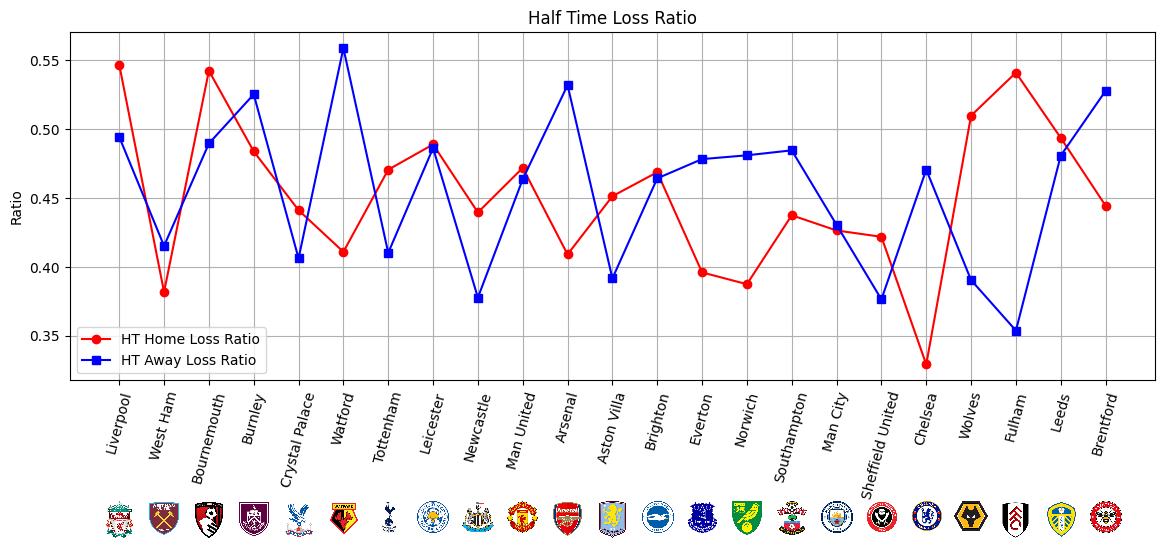

In [176]:
home_ratio = df['HT Home Loss'] / df['Home Loss']
away_ratio = df['HT Away Loss'] / df['Away Loss']

fig, ax = plt.subplots(figsize=(14, 6))
ax.plot(df['Teams'], home_ratio, marker='o', linestyle='-', label='HT Home Loss Ratio', color = 'r')
ax.plot(df['Teams'], away_ratio, marker='s', linestyle='-', label='HT Away Loss Ratio', color = 'b')
ax.set_ylabel('Ratio')
ax.set_title('Half Time Loss Ratio')
ax.legend()

ax.set_xticks(range(len(df['Teams'])))
plt.xticks(rotation=75)
# ax.set_xticklabels([''] * len(df['Teams']))  # Remove x-tick labels

# Add team logos below the x-axis, outside the plot area
for i, team in enumerate(df['Teams']):
    logo_path = team_logos[team]
    logo_img = mpimg.imread(logo_path)
    imagebox = OffsetImage(logo_img, zoom=0.1)  # Adjust zoom as needed
    ab = AnnotationBbox(imagebox, (i, -0.35),  # Position logos below x-axis
                        frameon=False, xycoords=('data', 'axes fraction'), box_alignment=(0.5, 1))
    ax.add_artist(ab)
    
# Adjust the margins to make space for the logos
plt.subplots_adjust(bottom=0.3)

plt.grid(True)
plt.show()

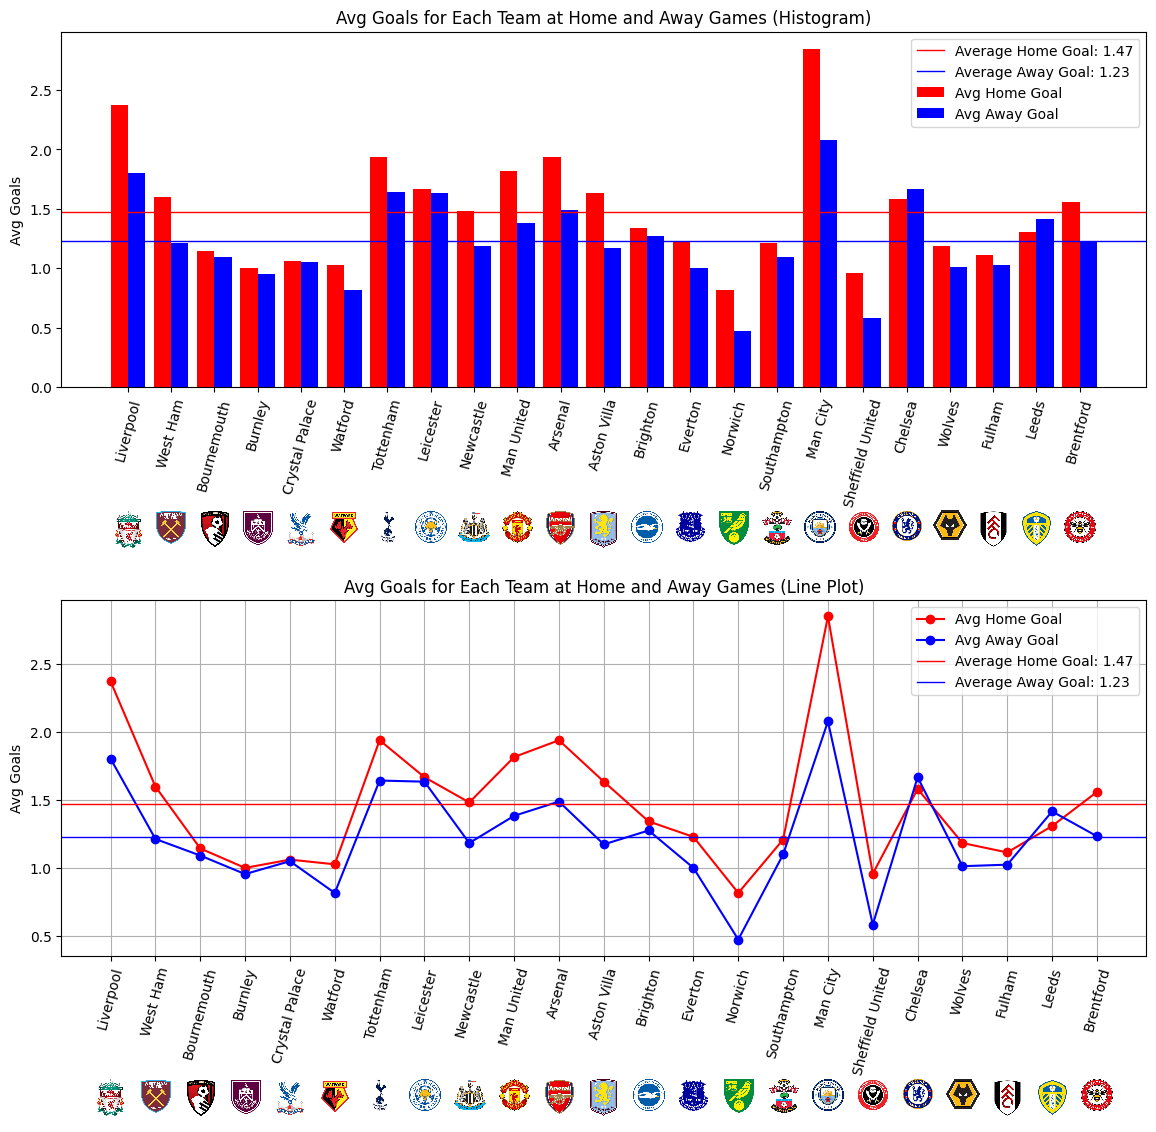

In [177]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 12))
fig.subplots_adjust(hspace=0.6)
width = 0.4  # width of the bars
x = range(len(df['Teams']))  # the label locations

# Plotting the histogram side by side on ax1
ax1.bar([p - width/2 for p in x], df['Avg Home Goal'], width=width, label='Avg Home Goal', color='r')
ax1.bar([p + width/2 for p in x], df['Avg Away Goal'], width=width, label='Avg Away Goal', color='b')

avg_home_g = df['Avg Home Goal'].mean()
avg_away_g = df['Avg Away Goal'].mean()
ax1.axhline(y=avg_home_g, color='r', linewidth=1, label=f'Average Home Goal: {avg_home_g:.2f}')
ax1.axhline(y=avg_away_g, color='b', linewidth=1, label=f'Average Away Goal: {avg_away_g:.2f}')

ax1.set_xticks(x)
ax1.set_xticklabels(df['Teams'], rotation=75)
ax1.set_ylabel('Avg Goals')
ax1.set_title('Avg Goals for Each Team at Home and Away Games (Histogram)')
ax1.legend()

for i, team in enumerate(df['Teams']):
    logo_path = team_logos[team]
    logo_img = mpimg.imread(logo_path)
    imagebox = OffsetImage(logo_img, zoom=0.1)  # Adjust zoom as needed
    ab = AnnotationBbox(imagebox, (i, -0.35),  # Position logos below x-axis
                        frameon=False, xycoords=('data', 'axes fraction'), box_alignment=(0.5, 1))
    ax1.add_artist(ab)


# Plotting the line plot on ax2
ax2.plot(df['Teams'], df['Avg Home Goal'], marker='o', color='r', label='Avg Home Goal')
ax2.plot(df['Teams'], df['Avg Away Goal'], marker='o', color='b', label='Avg Away Goal')

avg_home_g = df['Avg Home Goal'].mean()
avg_away_g = df['Avg Away Goal'].mean()
ax2.axhline(y=avg_home_g, color='r', linewidth=1, label=f'Average Home Goal: {avg_home_g:.2f}')
ax2.axhline(y=avg_away_g, color='b', linewidth=1, label=f'Average Away Goal: {avg_away_g:.2f}')

ax2.set_xticks(x)
ax2.set_xticklabels(df['Teams'], rotation=75)
ax2.set_ylabel('Avg Goals')
ax2.set_title('Avg Goals for Each Team per Home and Away Game (Line Plot)')
ax2.legend()

for i, team in enumerate(df['Teams']):
    logo_path = team_logos[team]
    logo_img = mpimg.imread(logo_path)
    imagebox = OffsetImage(logo_img, zoom=0.1)  # Adjust zoom as needed
    ab = AnnotationBbox(imagebox, (i, -0.35),  # Position logos below x-axis
                        frameon=False, xycoords=('data', 'axes fraction'), box_alignment=(0.5, 1))
    ax2.add_artist(ab)

ax2.grid(True)

plt.show()

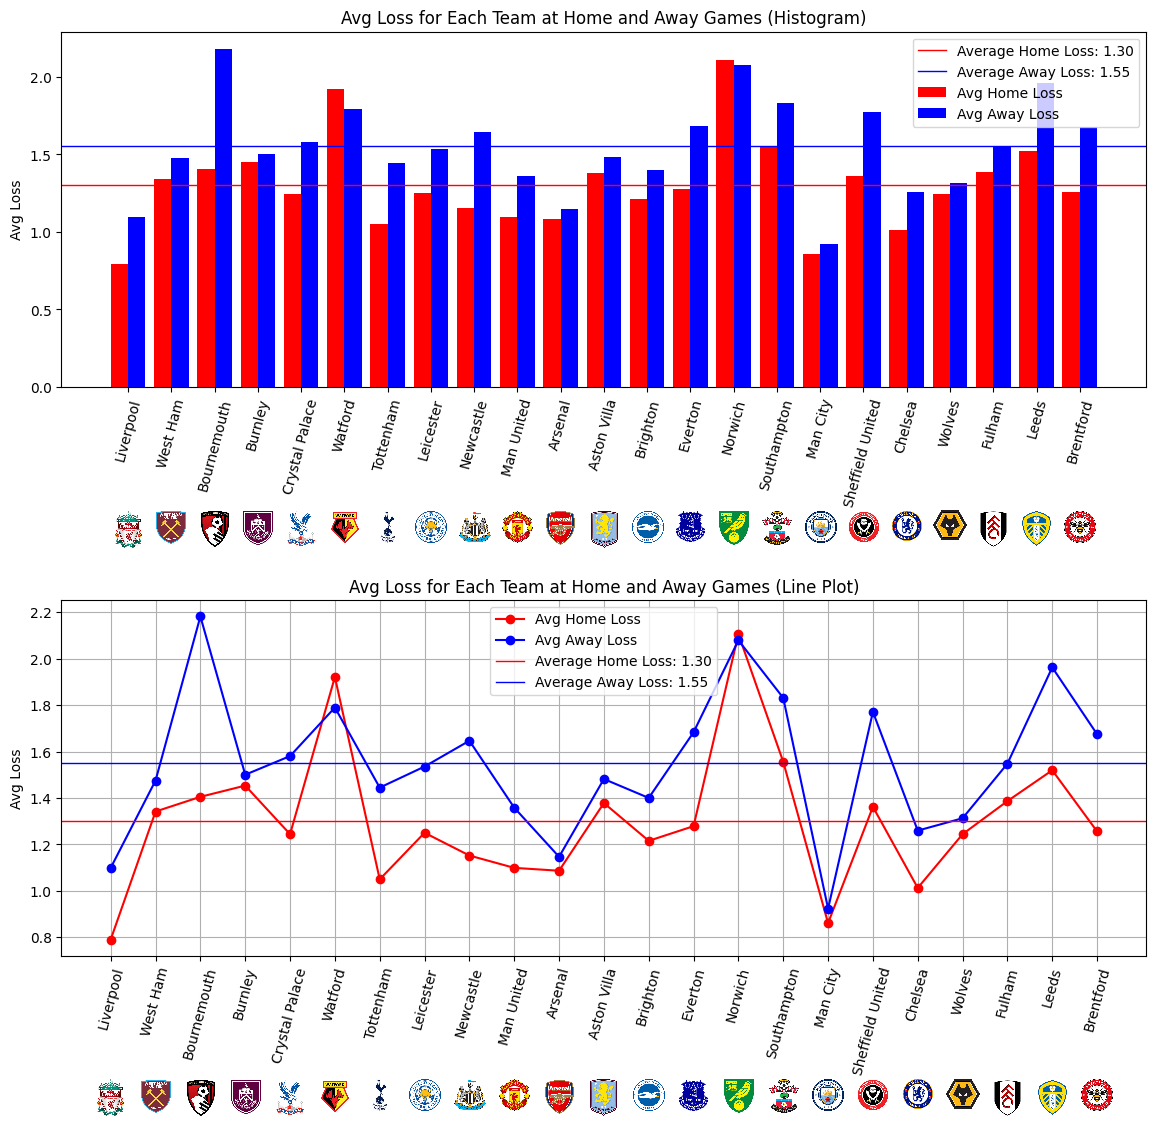

In [178]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 12))
fig.subplots_adjust(hspace=0.6)
width = 0.4  # width of the bars
x = range(len(df['Teams']))  # the label locations

# Plotting the histogram side by side on ax1
ax1.bar([p - width/2 for p in x], df['Avg Home Loss'], width=width, label='Avg Home Loss', color='r')
ax1.bar([p + width/2 for p in x], df['Avg Away Loss'], width=width, label='Avg Away Loss', color='b')

avg_home_l = df['Avg Home Loss'].mean()
avg_away_l = df['Avg Away Loss'].mean()
ax1.axhline(y=avg_home_l, color='r', linewidth=1, label=f'Average Home Loss: {avg_home_l:.2f}')
ax1.axhline(y=avg_away_l, color='b', linewidth=1, label=f'Average Away Loss: {avg_away_l:.2f}')

ax1.set_xticks(x)
ax1.set_xticklabels(df['Teams'], rotation=75)
ax1.set_ylabel('Avg Loss')
ax1.set_title('Avg Loss for Each Team at Home and Away Games (Histogram)')
ax1.legend()

for i, team in enumerate(df['Teams']):
    logo_path = team_logos[team]
    logo_img = mpimg.imread(logo_path)
    imagebox = OffsetImage(logo_img, zoom=0.1)  # Adjust zoom as needed
    ab = AnnotationBbox(imagebox, (i, -0.35),  # Position logos below x-axis
                        frameon=False, xycoords=('data', 'axes fraction'), box_alignment=(0.5, 1))
    ax1.add_artist(ab)

# Plotting the line plot on ax2
ax2.plot(df['Teams'], df['Avg Home Loss'], marker='o', color='r', label='Avg Home Loss')
ax2.plot(df['Teams'], df['Avg Away Loss'], marker='o', color='b', label='Avg Away Loss')

ax2.axhline(y=avg_home_l, color='r', linewidth=1, label=f'Average Home Loss: {avg_home_l:.2f}')
ax2.axhline(y=avg_away_l, color='b', linewidth=1, label=f'Average Away Loss: {avg_away_l:.2f}')

ax2.set_xticks(x)
ax2.set_xticklabels(df['Teams'], rotation=75)
ax2.set_ylabel('Avg Loss')
ax2.set_title('Avg Loss for Each Team at Home and Away Games (Line Plot)')
ax2.legend()

for i, team in enumerate(df['Teams']):
    logo_path = team_logos[team]
    logo_img = mpimg.imread(logo_path)
    imagebox = OffsetImage(logo_img, zoom=0.1)  # Adjust zoom as needed
    ab = AnnotationBbox(imagebox, (i, -0.35),  # Position logos below x-axis
                        frameon=False, xycoords=('data', 'axes fraction'), box_alignment=(0.5, 1))
    ax2.add_artist(ab)

ax2.grid(True)

plt.show()

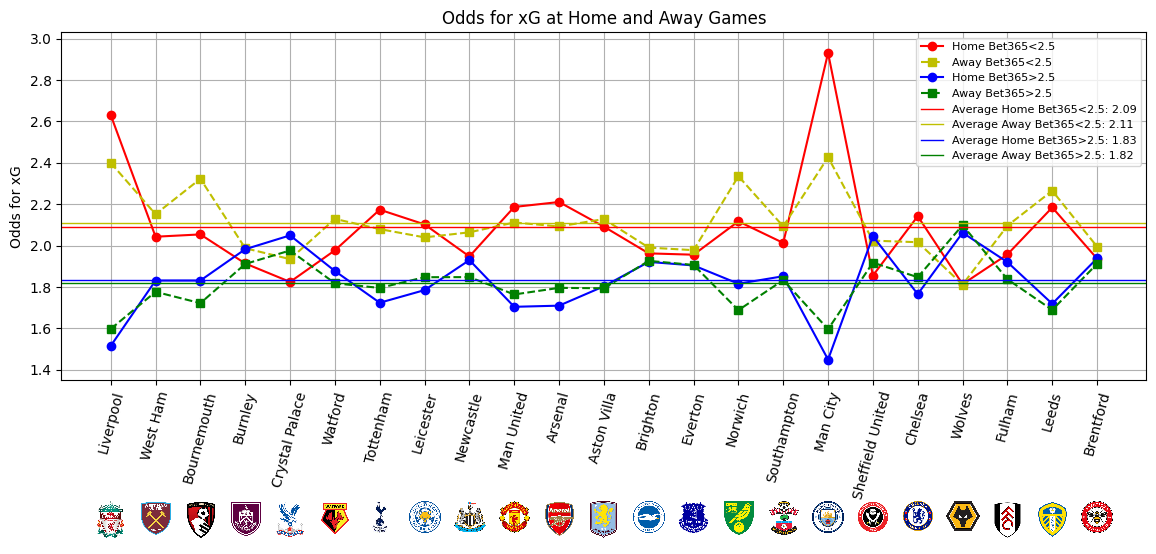

In [179]:
fig, ax = plt.subplots(figsize=(14, 6))
ax.plot(df['Teams'], df['Home B365<2.5'], marker='o', linestyle='-', label='Home Bet365<2.5', color = 'r')
ax.plot(df['Teams'], df['Away B365<2.5'], marker='s', linestyle='--', label='Away Bet365<2.5', color = 'y')
ax.plot(df['Teams'], df['Home B365>2.5'], marker='o', linestyle='-', label='Home Bet365>2.5', color = 'b')
ax.plot(df['Teams'], df['Away B365>2.5'], marker='s', linestyle='--', label='Away Bet365>2.5', color = 'g')

avg_home_s = df['Home B365<2.5'].mean()
avg_away_s = df['Away B365<2.5'].mean()
avg_home_l = df['Home B365>2.5'].mean()
avg_away_l = df['Away B365>2.5'].mean()
ax.axhline(y=avg_home_s, color='r', linewidth=1, label=f'Average Home Bet365<2.5: {avg_home_s:.2f}')
ax.axhline(y=avg_away_s, color='y', linewidth=1, label=f'Average Away Bet365<2.5: {avg_away_s:.2f}')
ax.axhline(y=avg_home_l, color='b', linewidth=1, label=f'Average Home Bet365>2.5: {avg_home_l:.2f}')
ax.axhline(y=avg_away_l, color='g', linewidth=1, label=f'Average Away Bet365>2.5: {avg_away_l:.2f}')



ax.set_ylabel('Odds for xG')
ax.set_title('Odds for xG at Home and Away Games')
# ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left') # make the legend outside of the plot

# Adjust x-ticks
ax.set_xticks(range(len(df['Teams'])))
plt.xticks(rotation=75)
ax.legend(prop={'size': 8})
# ax.set_xticklabels([''] * len(df['Teams']))  # Remove x-tick labels

# Add team logos below the x-axis, outside the plot area
for i, team in enumerate(df['Teams']):
    logo_path = team_logos[team]
    logo_img = mpimg.imread(logo_path)
    imagebox = OffsetImage(logo_img, zoom=0.1)  # Adjust zoom as needed
    ab = AnnotationBbox(imagebox, (i, -0.35),  # Position logos below x-axis
                        frameon=False, xycoords=('data', 'axes fraction'), box_alignment=(0.5, 1))
    ax.add_artist(ab)

# Adjust the limits to make space for the logos
ax.set_ylim(min(df['Home B365<2.5'].min(), df['Away B365<2.5'].min(), df['Home B365>2.5'].min(), df['Away B365>2.5'].min()) - 0.1, 
            max(df['Home B365<2.5'].max(), df['Away B365<2.5'].max(), df['Home B365>2.5'].max(), df['Away B365>2.5'].max()) + 0.1)

# Adjust the margins to make space for the logos
plt.subplots_adjust(bottom=0.3)

plt.grid(True)
plt.show()